In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import csv

In [2]:
data_dir = '/home/algol/CRP2019-Cosmo-Depuration/dec28/Run2-50Mpart/'

In [3]:
all_files = os.listdir(data_dir)
all_files

['DEAR_NEWPOSITIONS_5.csv',
 'DEAR_NEWPOSITIONS_12.csv',
 'DEAR_NEWPOSITIONS_9.csv',
 'DEAR_NEWPOSITIONS_10.csv',
 'DEAR_NEWPOSITIONS_3.csv',
 'DEAR_NEWPOSITIONS_1.csv',
 'DEAR_NEWPOSITIONS_2.csv',
 'DEAR_NEWPOSITIONS_7.csv',
 'DEAR_NEWPOSITIONS_11.csv',
 'DEAR_NEWPOSITIONS_8.csv',
 'DEAR_NEWPOSITIONS_4.csv',
 'DEAR_NEWPOSITIONS_6.csv']

In [6]:
data = {}
for i in range(1, 13):
    data[i] = pd.read_csv(data_dir + 'DEAR_NEWPOSITIONS_' + str(i) + '.csv')
    print(data[i].shape)

(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)
(4166667, 3)


In [7]:
nsamp = data[1].shape[0]*12

In [8]:
data_cut = {}
for i in range(1,13):
    data_cut[i] = data[i].sample(n=1000000)

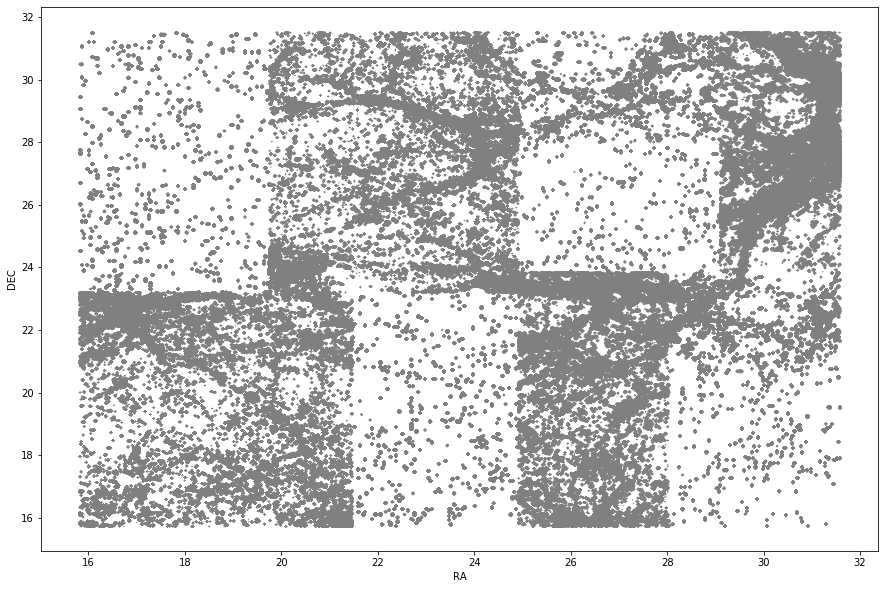

In [9]:
plt.figure(figsize=(15,10))
for i in range(1, 13):
    plt.scatter(data[i]['x'], data[i]['y'], s=0.01, color='grey')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('plot_by_emille_from_alberto_code.png')

In [2]:
data_path = '/media/CRP6/Cosmology/recidivator/SLICS/particle_data/0.042cut.csv'
data_raw = pd.read_csv(data_path)

In [3]:
data_raw_cut = data_raw.sample(n=30000)

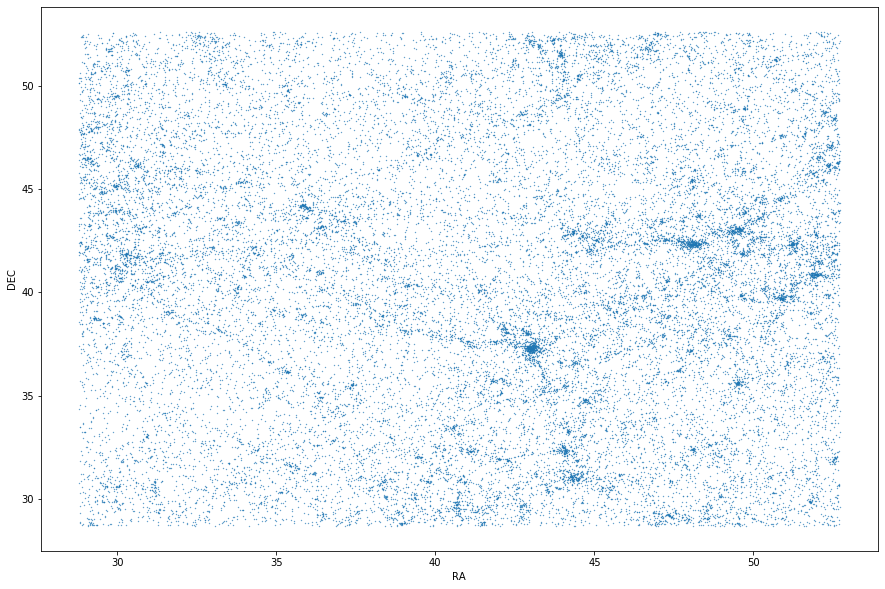

In [4]:
plt.figure(figsize=(15,10))
plt.scatter(data_raw_cut['RA'], data_raw_cut['DEC'], s=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('raw_data.png')

In [5]:
ntotal = data_raw.shape[0]
ntotal

33684099

In [6]:
npercell = ntotal/12
npercell

2807008.25

In [7]:
def split_4(raw_data):
    split_RA = np.median(raw_data['RA'].values)
    xlow_flag = raw_data['RA'].values < split_RA
    
    data_xlow = raw_data[xlow_flag]
    data_xhigh = raw_data[~xlow_flag]
    
    xlow_ysplit = np.median(data_xlow['DEC'].values)
    xlow_ylow_flag = data_xlow['DEC'].values < xlow_ysplit
    data_xlow_ylow = data_xlow[xlow_ylow_flag]
    data_xlow_yhigh = data_xlow[~xlow_ylow_flag]

    xhigh_ysplit = np.median(data_xhigh['DEC'].values)
    xhigh_ylow_flag = data_xhigh['DEC'].values < xhigh_ysplit
    data_xhigh_ylow = data_xhigh[xhigh_ylow_flag]
    data_xhigh_yhigh = data_xhigh[~xhigh_ylow_flag]
    
    xlow_ysplit = np.median(data_xlow['DEC'].values)
    xlow_ylow_flag = data_xlow['DEC'].values < xlow_ysplit
    data_xlow_ylow = data_xlow[xlow_ylow_flag]
    data_xlow_yhigh = data_xlow[~xlow_ylow_flag]

    xhigh_ysplit = np.median(data_xhigh['DEC'].values)
    xhigh_ylow_flag = data_xhigh['DEC'].values < xhigh_ysplit
    data_xhigh_ylow = data_xhigh[xhigh_ylow_flag]
    data_xhigh_yhigh = data_xhigh[~xhigh_ylow_flag]
    
    final_data = {}
    final_data['00'] = data_xlow_ylow
    final_data['01'] = data_xlow_yhigh
    final_data['10'] = data_xhigh_ylow
    final_data['11'] = data_xhigh_yhigh
    
    return final_data
    

In [12]:
data_4parts = split_4(data_raw)

In [13]:
def split_16(data_4parts):
    
    data_out = {}
    for key in data_4parts.keys():
        data_out[key] = split_4(data_4parts[key])
        
    return data_out    

In [14]:
data_16parts = split_16(data_4parts)

In [20]:
for key in data_4parts.keys():
    for key2 in data_4parts.keys():
        for key3 in data_4parts.keys():
            fname = "../alberto_codes/data/raw_data_split/rawdata_" + key + "_" + key2 + ".csv"
            data_16parts[key][key2].to_csv(fname)

In [15]:
data_16parts['00']['00'].to_csv('test_00_00.csv')

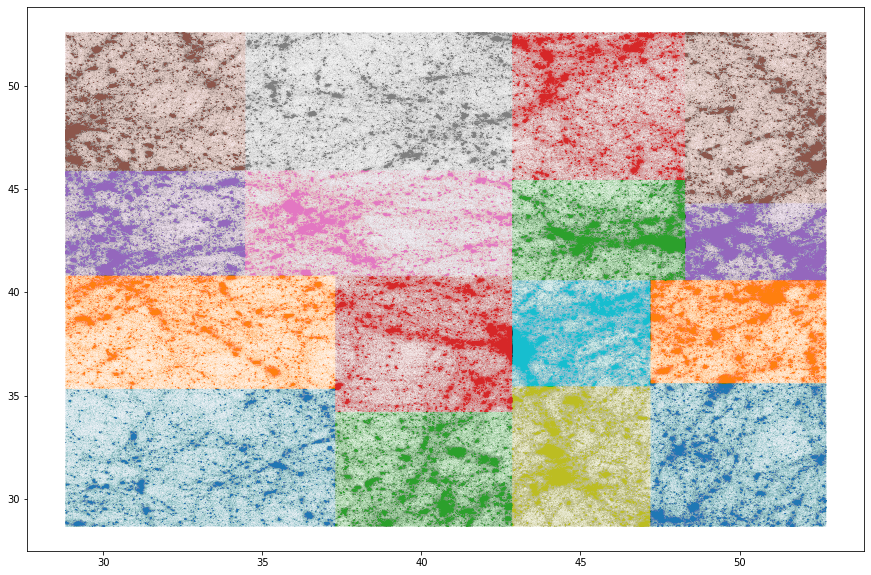

In [26]:
plt.figure(figsize=(15,10))
for key in data_4parts.keys():
    for key2 in data_4parts.keys():
        plt.scatter(data_16parts[key][key2]['RA'], data_16parts[key][key2]['DEC'], s=0.00001)
plt.show()        

In [16]:
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro

spatstat = importr('spatstat')
sparr = importr('sparr')

In [ ]:
# read variables into R section
ro.r('h0 = 0.01')
ro.r('resolution = 256')
ro.r('df <- read.csv("test_00_00.csv")')  # hear I am reading 1/16 of the data I separated myself

# get single columns from data frame
ro.r('x <- df$RA')
ro.r('y <- df$DEC')

# put in the correct format
ro.r('myPointData <- ppp(x, y, xrange=range(x), yrange=range(y))')

# do KDE
ro.r('ddest <- bivariate.density(myPointData, h0=h0, adapt=TRUE, resolution=resolution)')

==

From cffi callback <function _processevents at 0x7f4a10e37d08>:
Traceback (most recent call last):
  File "/media/emille/git/COIN/CRP6/coinFR2019_Cosmology/cosmo/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


=

From cffi callback <function _processevents at 0x7f4a10e37d08>:
Traceback (most recent call last):
  File "/media/emille/git/COIN/CRP6/coinFR2019_Cosmology/cosmo/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
From cffi callback <function _processevents at 0x7f4a10e37d08>:
Traceback (most recent call last):
  File "/media/emille/git/COIN/CRP6/coinFR2019_Cosmology/cosmo/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
From cffi callback <function _processevents at 0x7f4a10e37d08>:
Traceback (most recent call last):
  File "/media/emille/git/COIN/CRP6/coinFR2019_Cosmology/cosmo/lib/python3.7/site-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


In [20]:
# output from KDE
ro.r('myDensEst <- ddest$z')

# define boundaries
ro.r('mins <- c(min(x), min(y))')
ro.r('maxs <- c(max(x), max(y))'

# output file name
ro.r('outfilename = "test_00_00.rds"')
     
# save to file
ro.r('saveRDS(object=list(kde2d=myDenEst, mins=mins, maxs=maxs), file=outfilename)')

SyntaxError: invalid syntax (<ipython-input-20-d01205618c00>, line 9)

In [31]:
h0 = 0.01
resolution = 256
x = r_from_pd_df
y = r_from_pd_df.get_attrib('DEC')
rrange = ro.r('range')

xrange = rrange(x)
yrange = rrange(y)

data_r = spatstat.ppp(x, y, xrange=xrange, yrange=yrange)
#ddest = sparr.bivariate_density(r_from_pd_df, h0=h0, adapt=True, 
#                                resolution=resolution)

R[write to console]: Error in owin(...) : 
  xrange should be a vector of length 2 giving (xmin, xmax)
Calls: <Anonymous> -> owin

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In min(x, na.rm = na.rm) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to min; returning Inf

R[write to console]: 2: 
R[write to console]: In max(x, na.rm = na.rm) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 3: 
R[write to console]: In min(x, na.rm = na.rm) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to min; returning Inf

R[write to console]: 4: 
R[write to console]: In max(x, na.rm = na.rm) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf

R[write to console]: 5: 
R[write to console]: In min(x, na.rm = na.rm) :
R[write to console]: 
 
R[write to console]:  no no

RRuntimeError: Error in owin(...) : 
  xrange should be a vector of length 2 giving (xmin, xmax)
Calls: <Anonymous> -> owin


In [ ]:
sparr.bivariate_density